In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
WORK_DIR = 'result'
STEEPEST = 'steepest.csv'
GREEDY = 'greedy.csv'
HEURISTIC = 'heuristic.csv'
RANDOM = 'random.csv'
ANNEALING = 'annealing.csv'
TABU = 'tabu.csv'

In [9]:
def column_plot(column, df, path):
    mean = df.groupby(by = ['algorithm'])[column].describe()['mean']
    std = df.groupby(by = ['algorithm'])[column].describe()['std']
    best =  df.groupby(by = ['algorithm'])[column].describe()['min']
    f = mean.plot.bar(yerr=std, figsize = (10,10), title = column)
    best.plot.line(ax = f,  style = 'bo')
    plt.savefig(os.path.join(path, column + '_by_algorithm.png'))
    plt.cla()
    
def quality_plot(df, path):
    df['startQuality'] =  df['firstSolutionCost'] - df['optimalSolutionCost']
    df['finalQuality'] =  df['cost'] - df['optimalSolutionCost']
    
    for alg, alg_df in df.groupby(by = ['algorithm']):
        alg_df.plot.scatter('startQuality', 'finalQuality', figsize = (10,10), title = alg)
        plt.savefig(os.path.join(path, 'quality' + '_by_' + alg +'.png'))
        plt.cla()
        
def reruns_plot(df, path):
    df['quality'] = df['cost'] - df['optimalSolutionCost']
    for alg, alg_df in df.groupby(by = ['algorithm']):
        min_r = []
        mean_r = []
        for i in range(0, len(alg_df)):
            min_r.append(alg_df['quality'][0:i+1].min())
            mean_r.append(alg_df['quality'][0:i+1].mean())
        d = {'min': pd.Series(min_r), 'mean' : pd.Series(mean_r)}
        d = pd.DataFrame(d)
        d[['min', 'mean']].plot(title = alg)
        plt.savefig(os.path.join(path, 'rerun' + '_by_' + alg +'.png'))
        plt.cla()

def join_df(instance_dir, sample_size = 10):
    random_df = pd.read_csv(os.path.join(instance_dir, RANDOM), quotechar = "'").sample(sample_size)
    random_df['algorithm'] = 'random'
    greedy_df = pd.read_csv(os.path.join(instance_dir, GREEDY), quotechar = "'").sample(sample_size)
    greedy_df['algorithm'] = 'greedy'
    heuristic_df = pd.read_csv(os.path.join(instance_dir, HEURISTIC), quotechar = "'").sample(sample_size)
    heuristic_df['algorithm'] = 'heuristic'
    steepest_df = pd.read_csv(os.path.join(instance_dir, STEEPEST), quotechar = "'").sample(sample_size)
    steepest_df['algorithm'] = 'steepest'
    annealing_df = pd.read_csv(os.path.join(instance_dir, ANNEALING), quotechar = "'").sample(sample_size)
    annealing_df['algorithm'] = 'annealing'
    tabu_df = pd.read_csv(os.path.join(instance_dir, TABU), quotechar = "'").sample(sample_size)
    tabu_df['algorithm'] = 'tabu'
    all_df = pd.concat([random_df, greedy_df, heuristic_df, steepest_df, annealing_df, tabu_df])
    return all_df
    
def make_plots(instance_dir):
    path = os.path.join(instance_dir, "plots")
    if not os.path.isdir(path):
        os.mkdir(path)
    sample_df = join_df(instance_dir, sample_size = 10)
    sample_df['efficiency'] =  sample_df['cost'] / sample_df['timeMillis']
    sample_df['quality'] = sample_df['cost'] - sample_df['optimalSolutionCost']
    column_plot('stepsCount', sample_df, path)
    column_plot('solutionsChecked', sample_df, path)
    column_plot('quality', sample_df, path)
    column_plot('efficiency', sample_df, path)
    sample_df = join_df(instance_dir, sample_size = 20)
    quality_plot(sample_df, path)
    all_df = join_df(instance_dir, sample_size = 20)
    reruns_plot(all_df, path)
    
    
    

result\bur26b
result\bur26e


C:\Users\mikolaj.szal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


result\bur26g
result\nug28
result\tail20a
result\tail2a
result\tail5a
result\tail7a


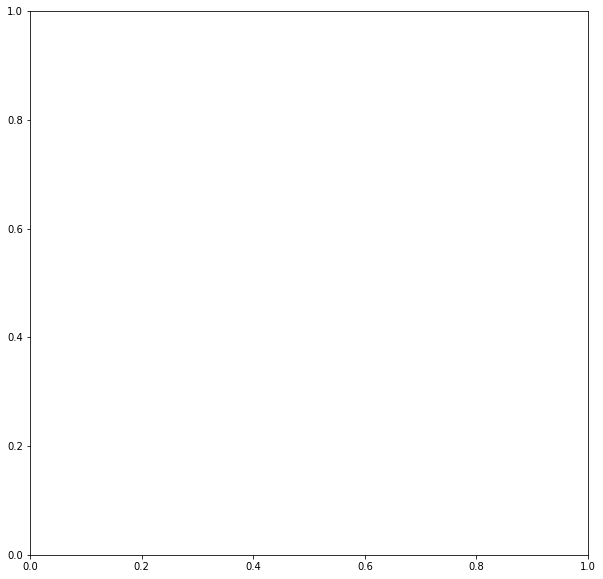

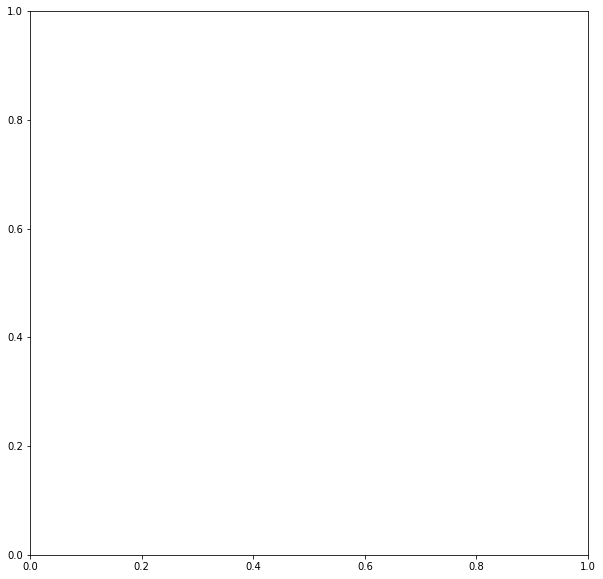

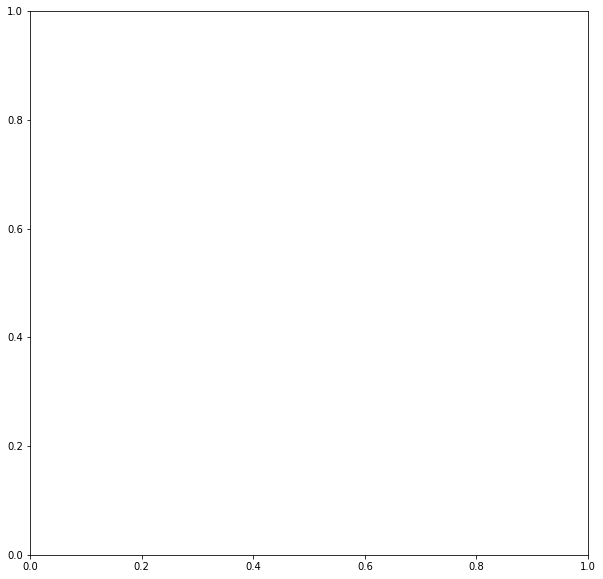

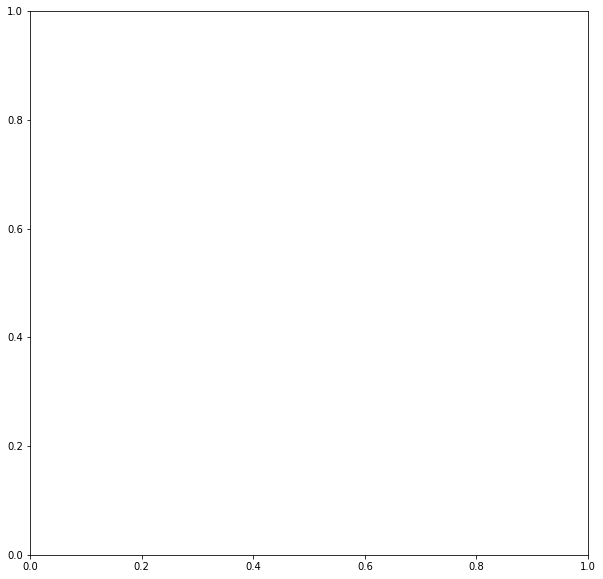

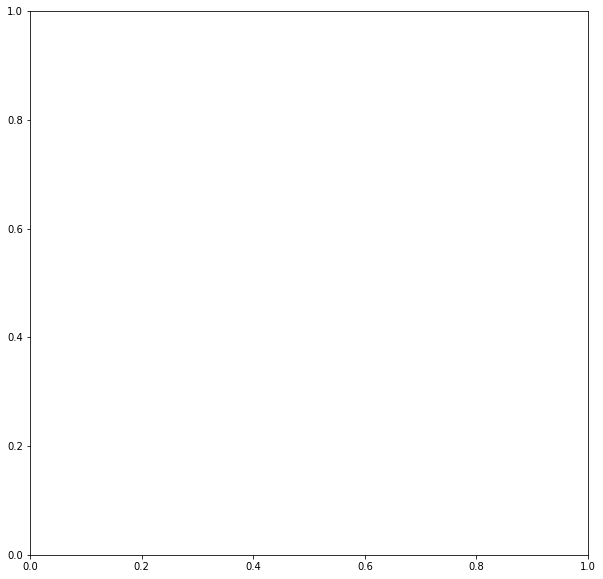

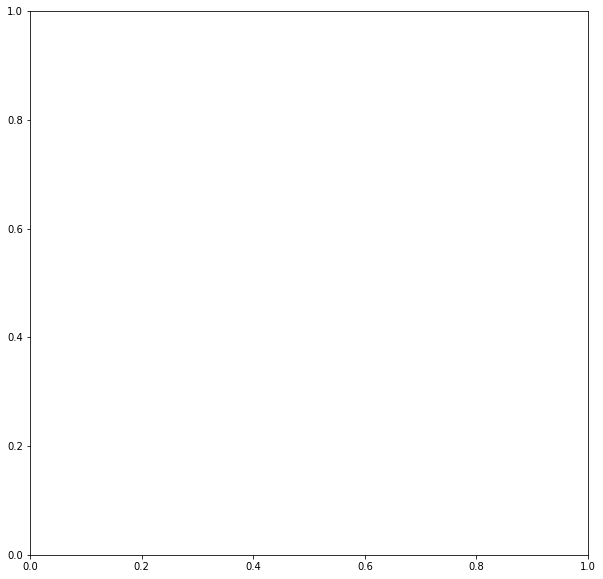

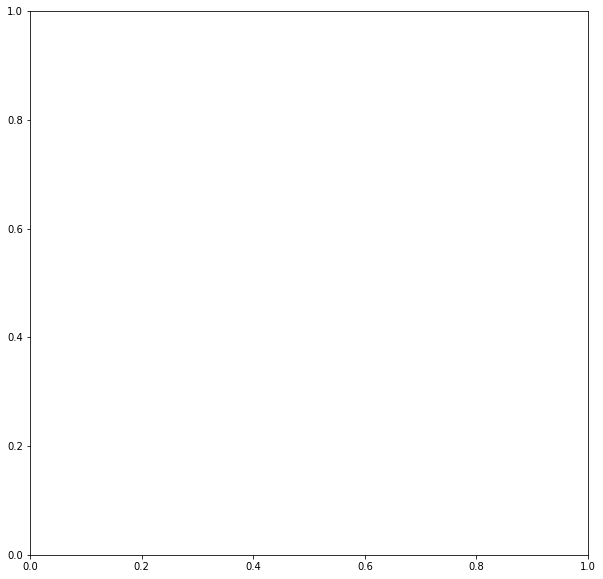

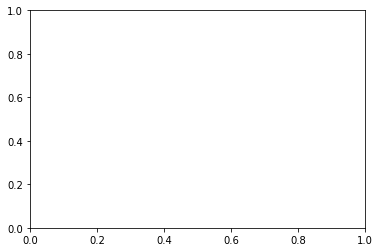

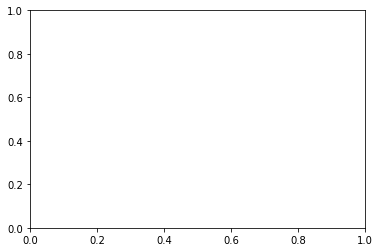

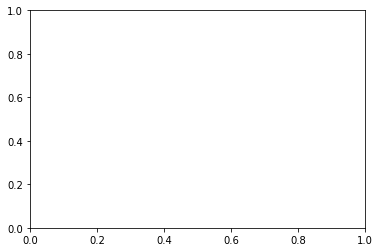

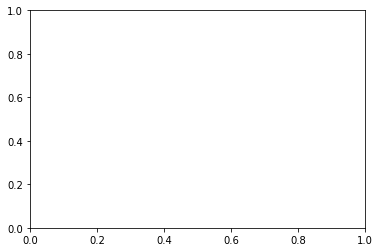

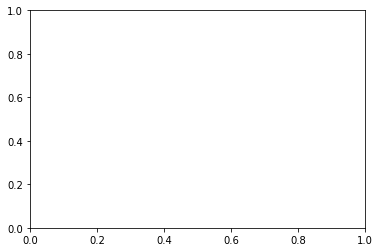

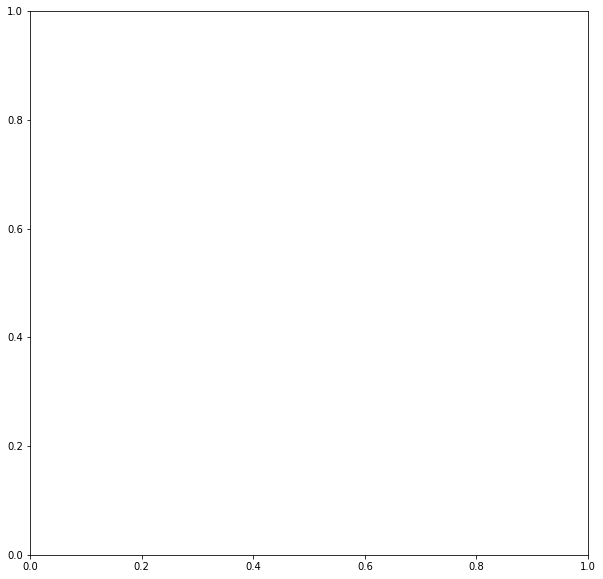

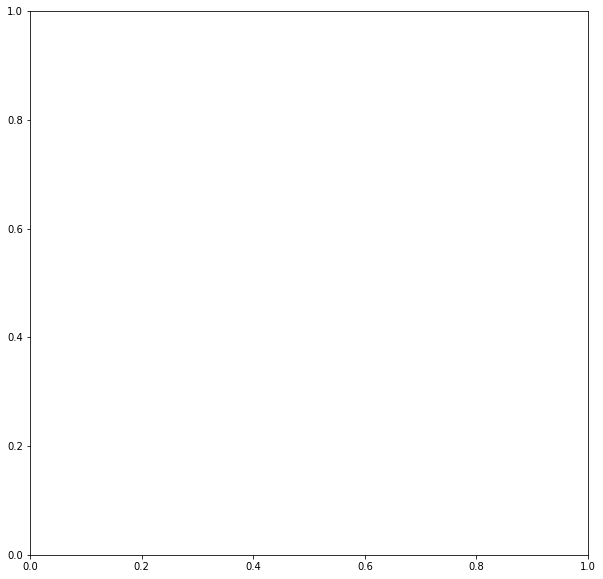

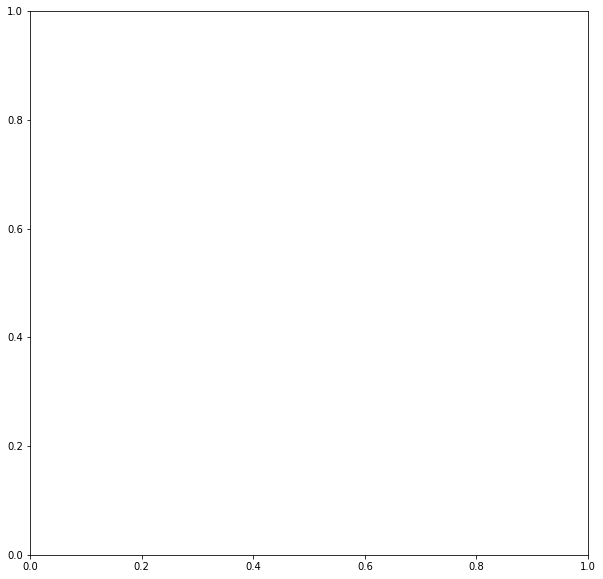

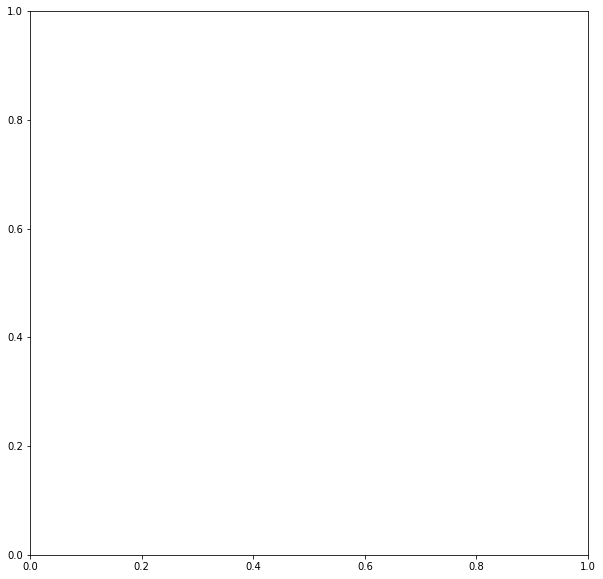

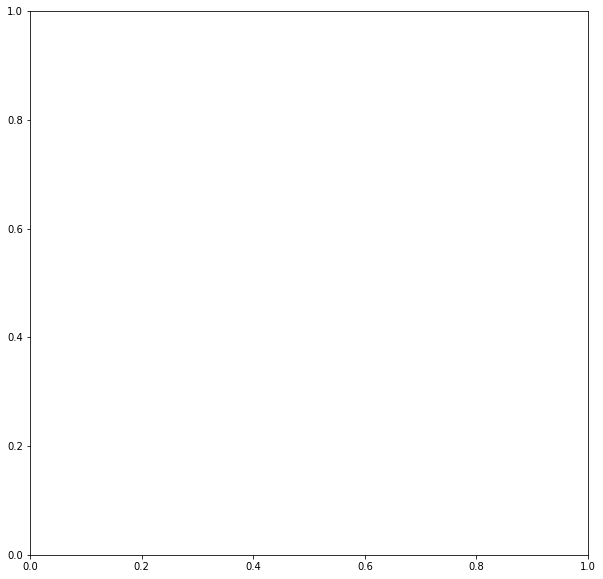

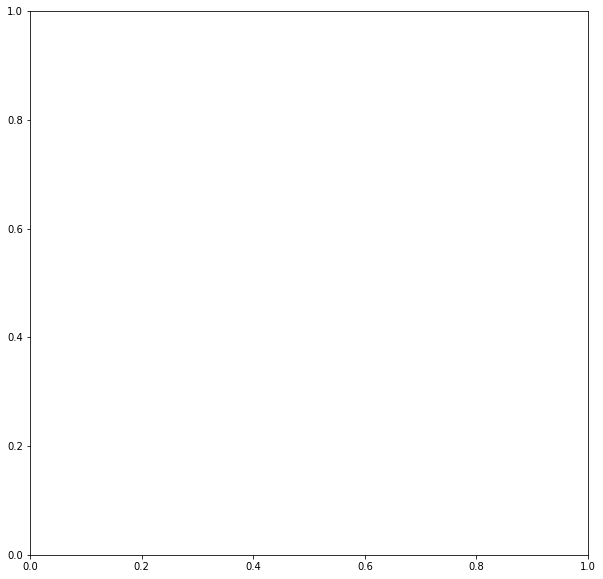

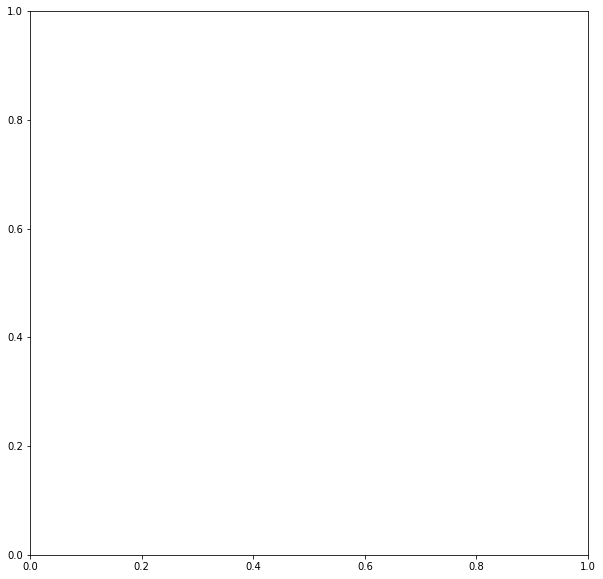

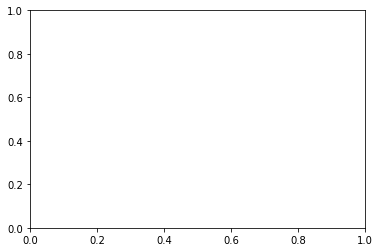

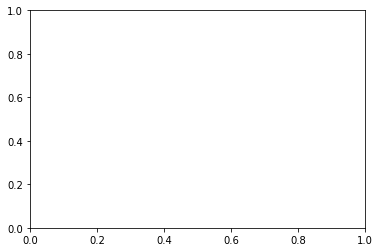

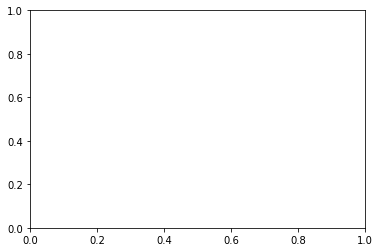

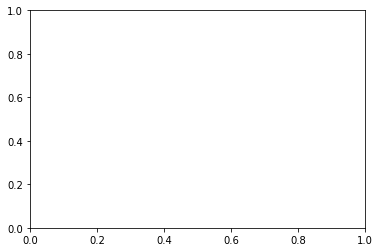

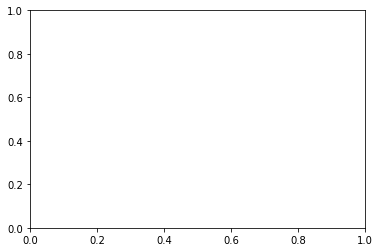

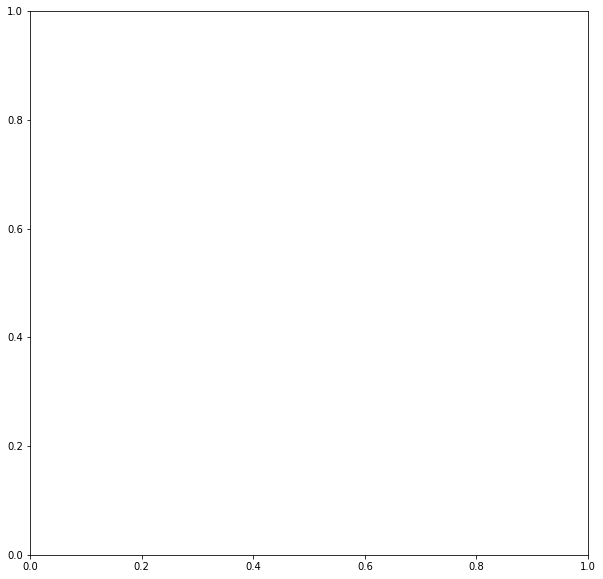

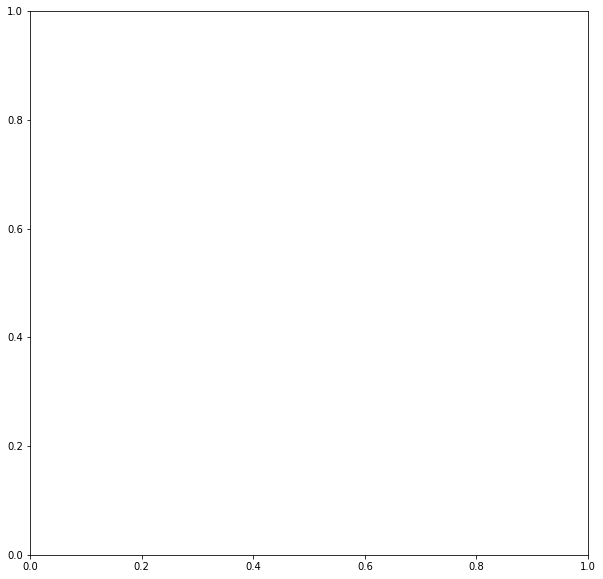

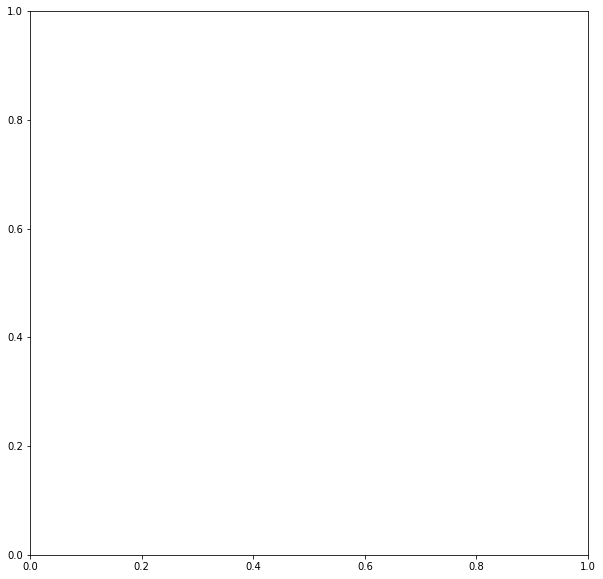

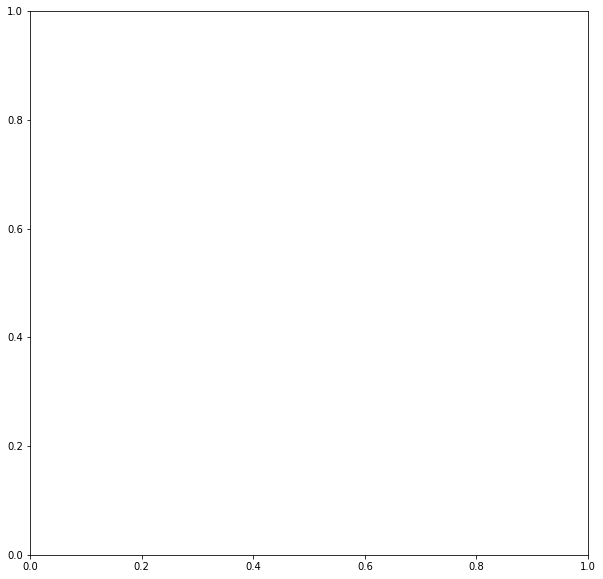

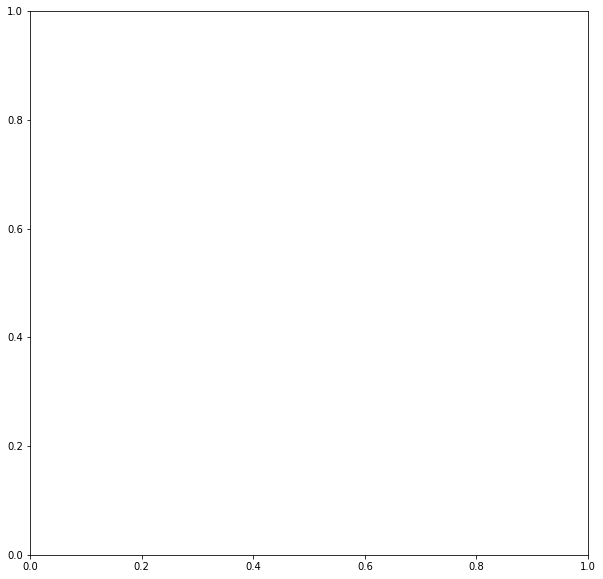

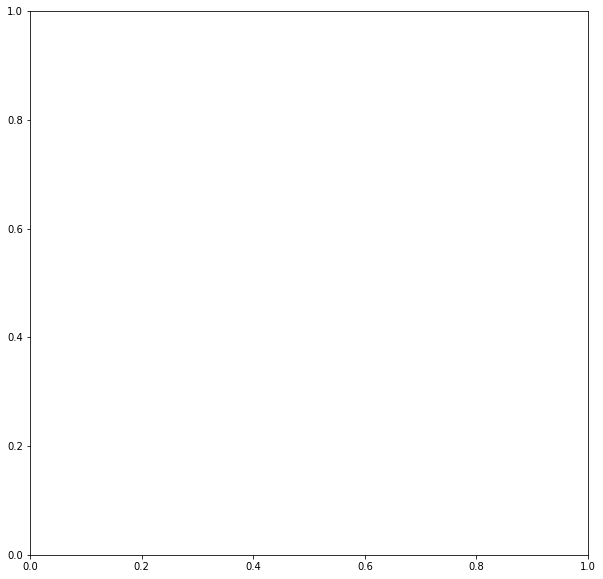

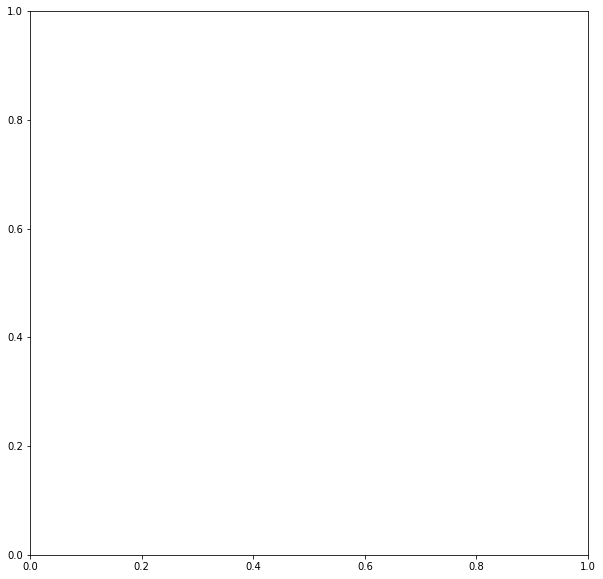

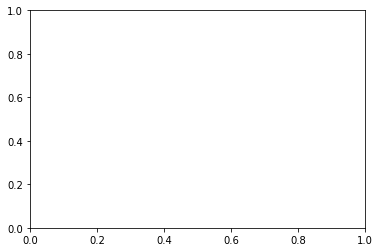

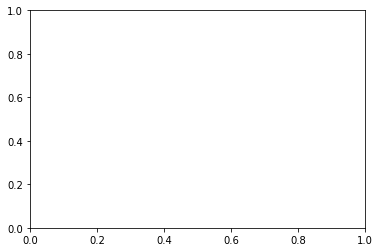

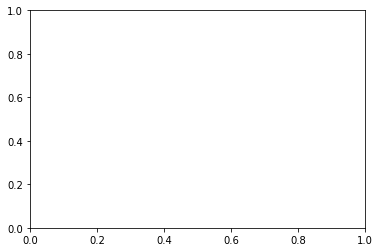

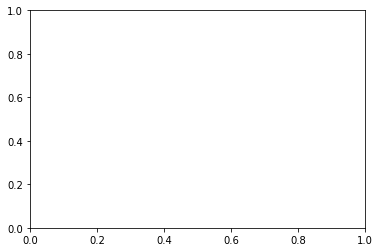

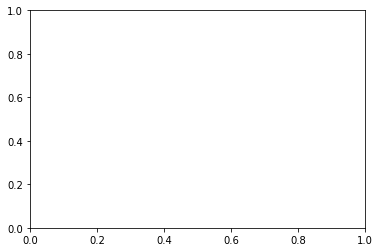

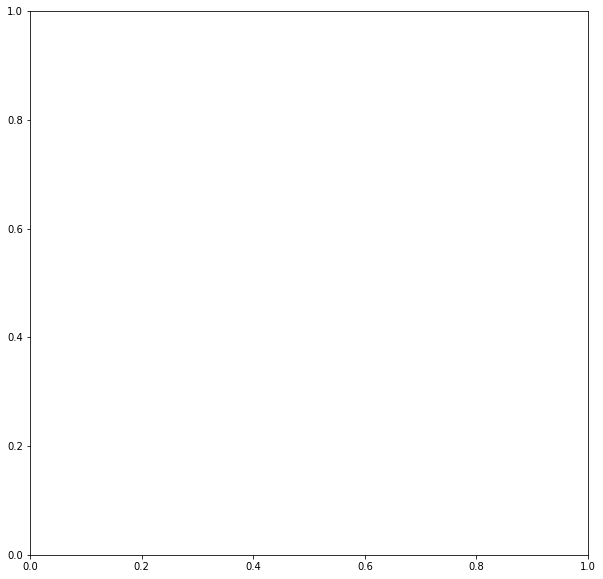

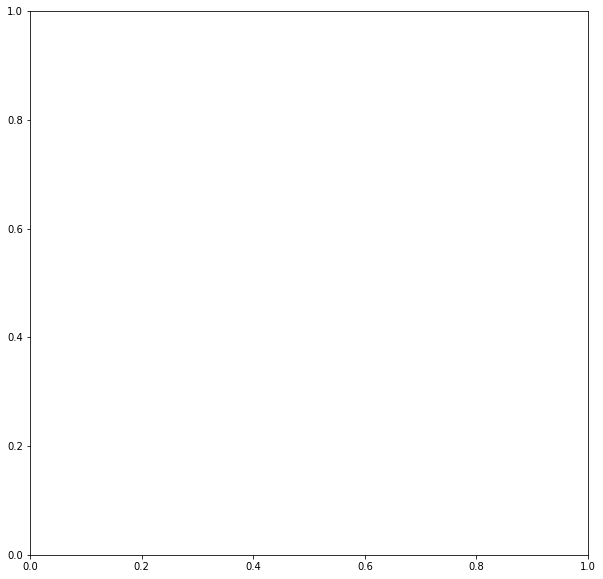

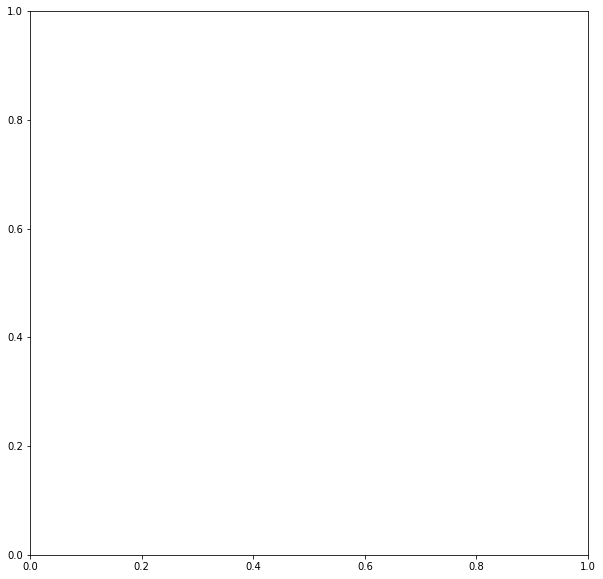

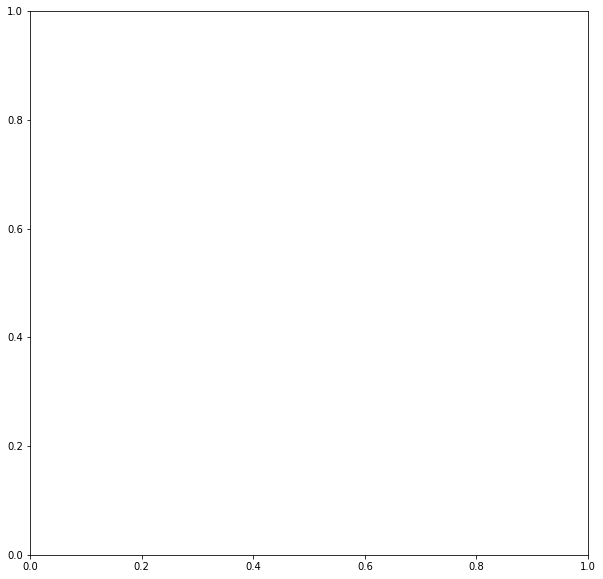

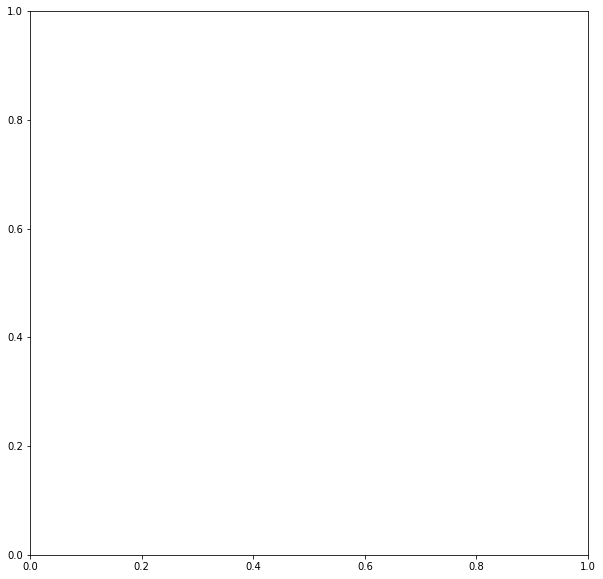

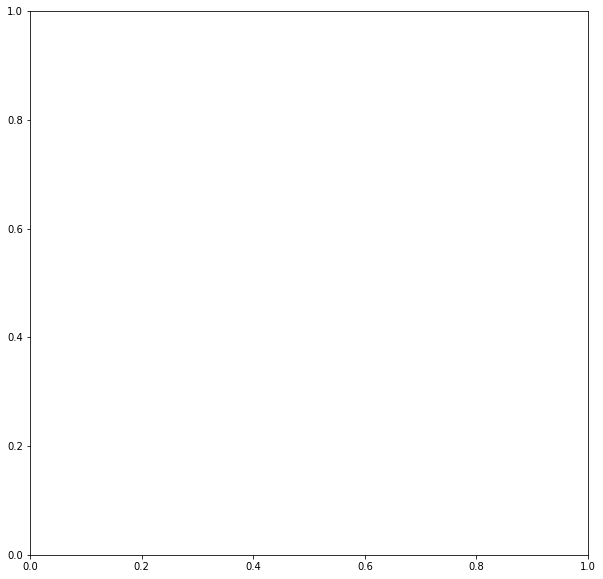

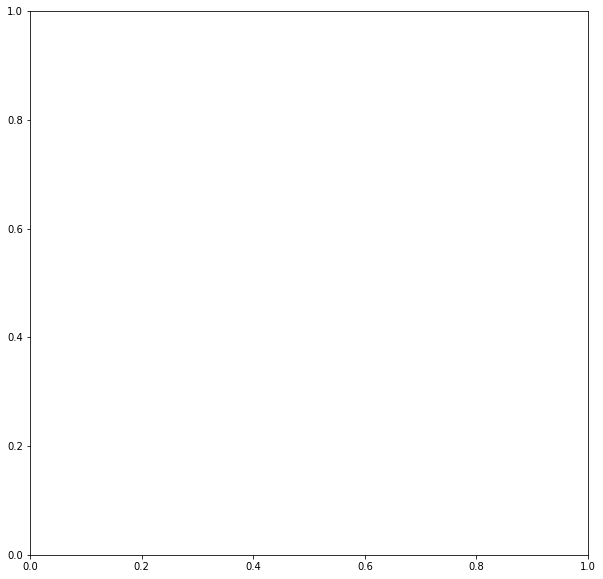

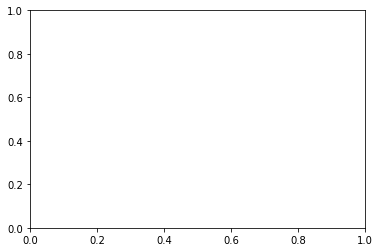

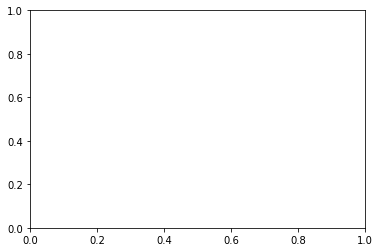

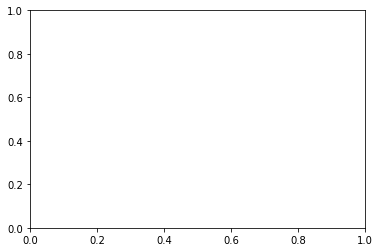

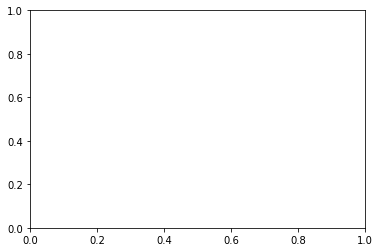

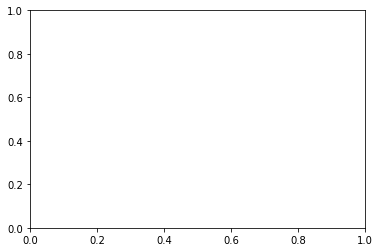

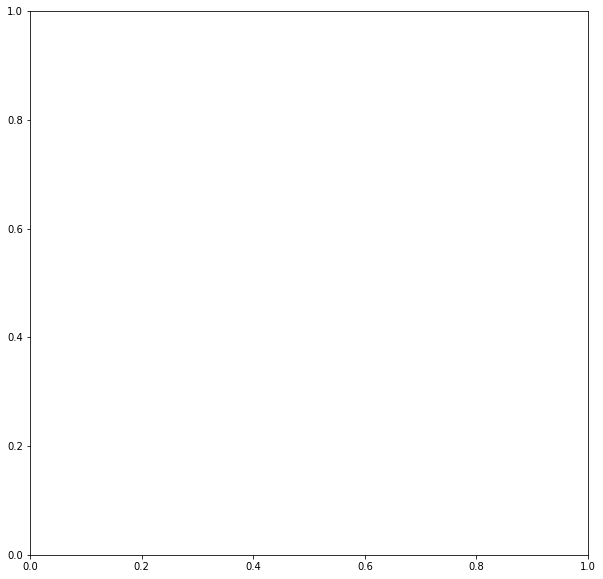

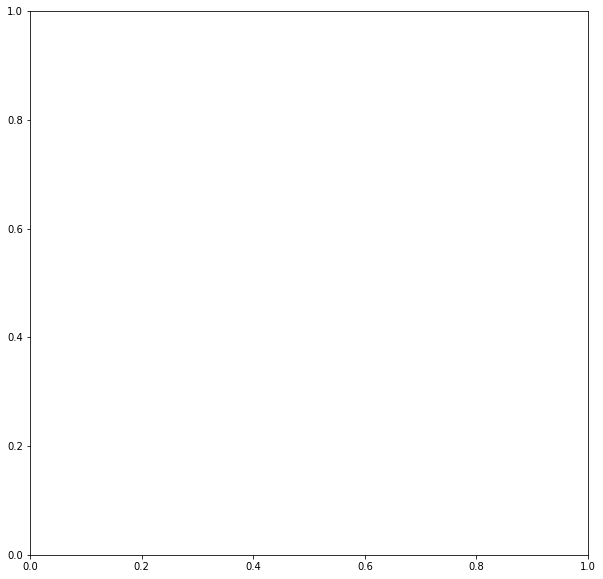

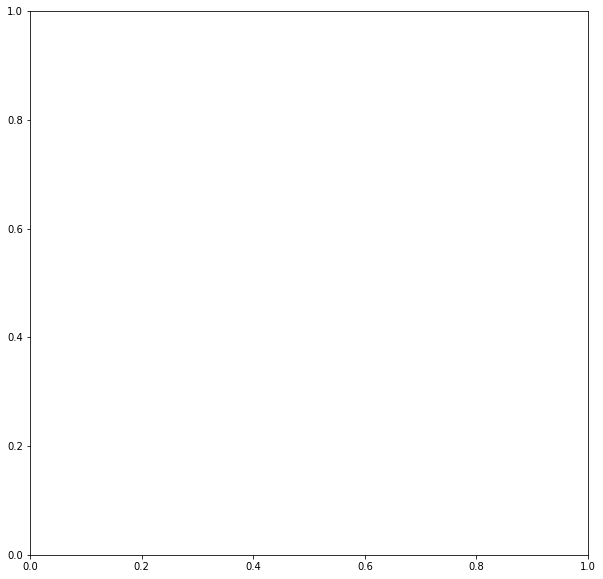

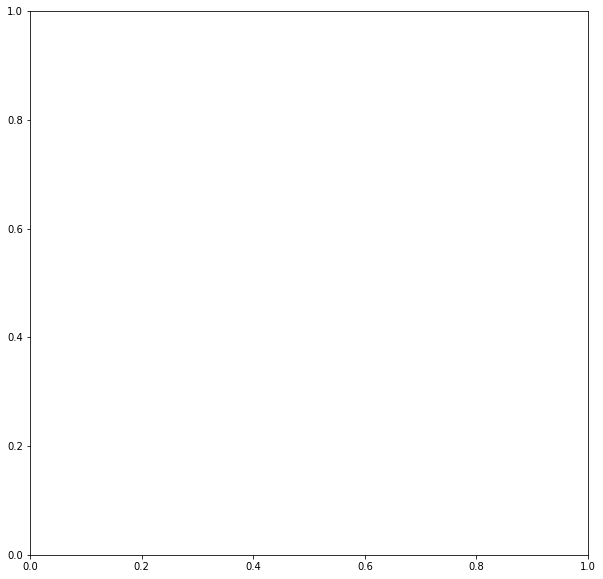

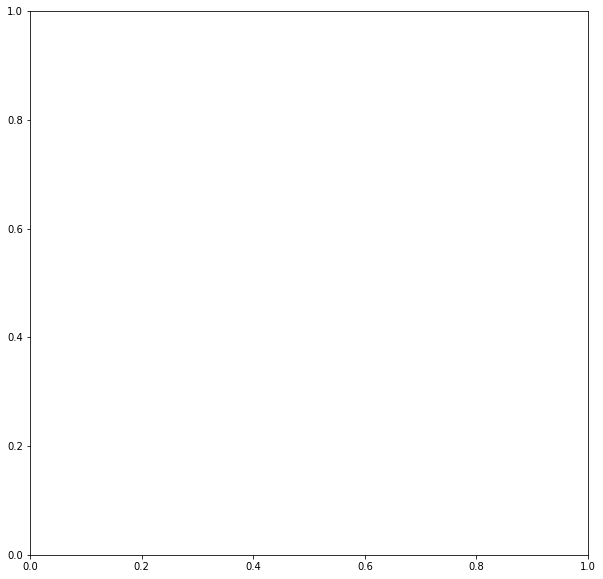

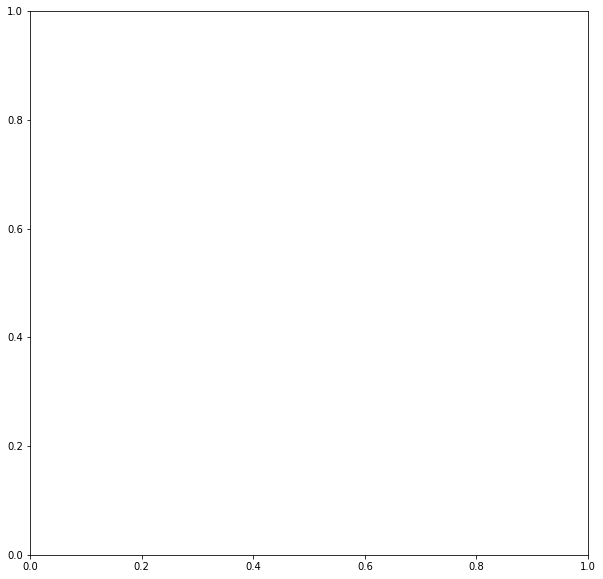

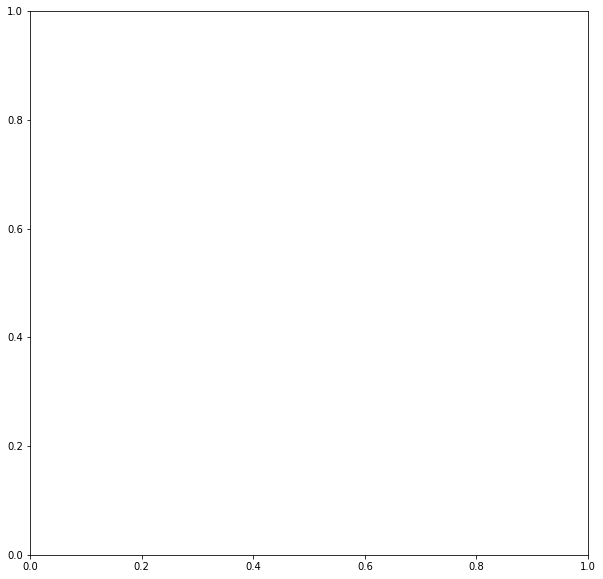

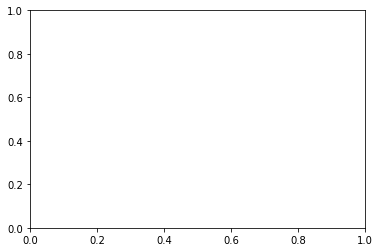

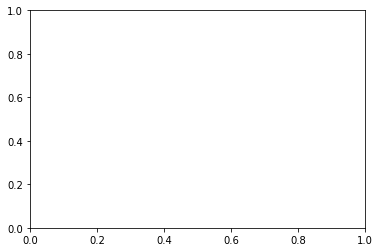

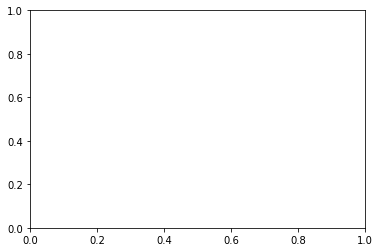

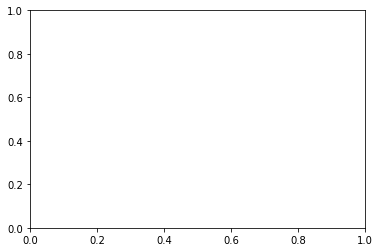

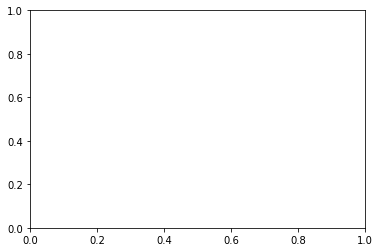

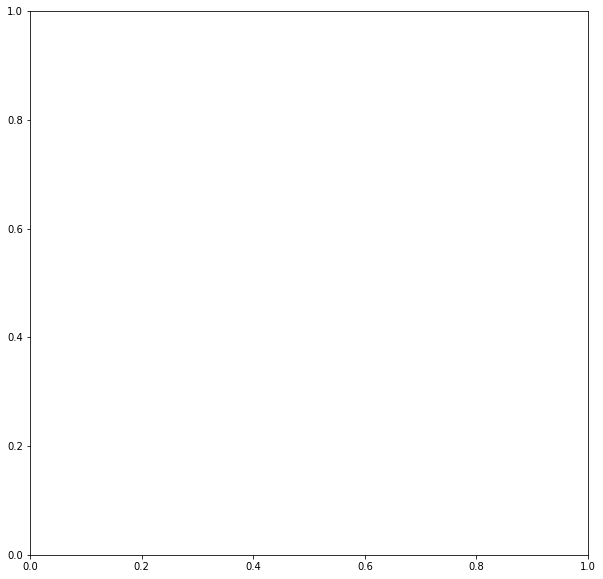

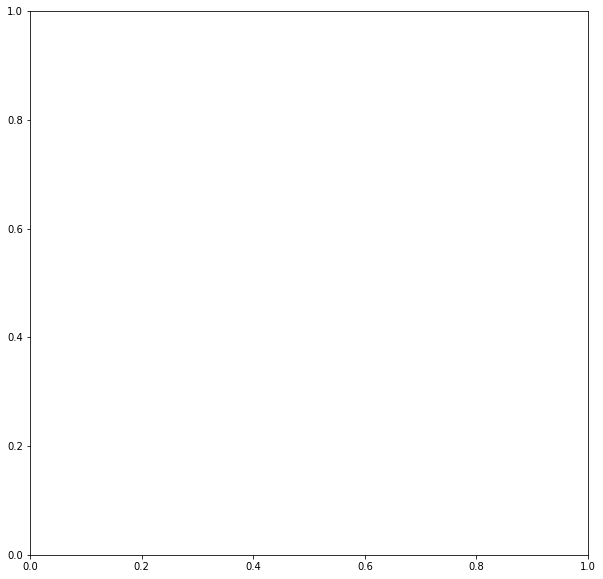

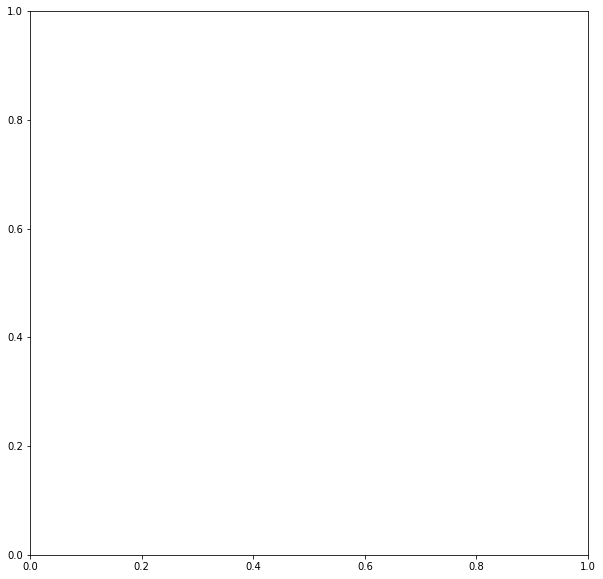

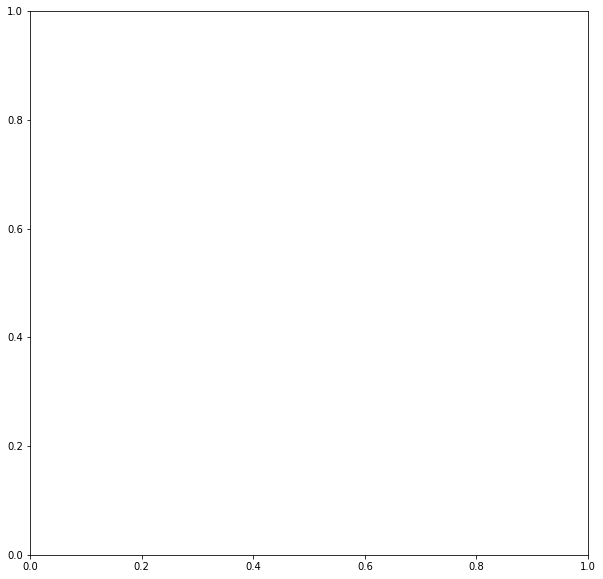

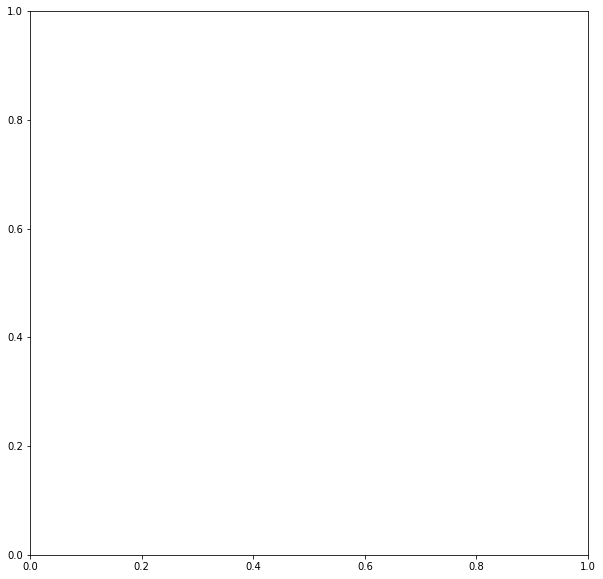

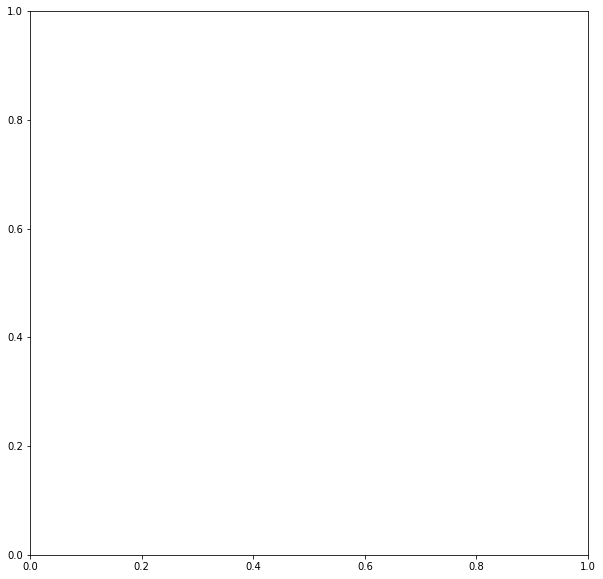

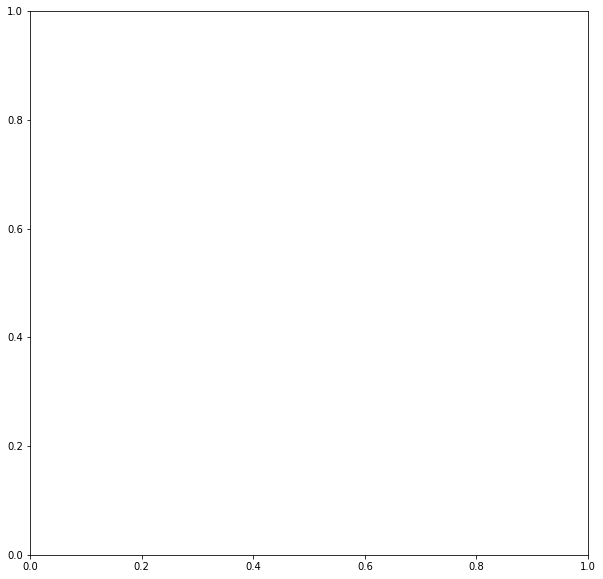

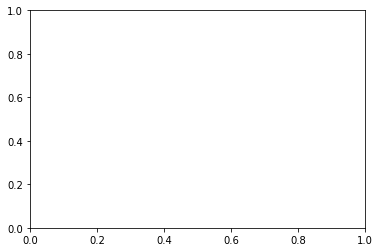

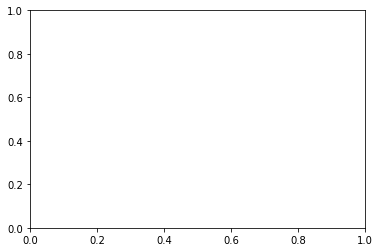

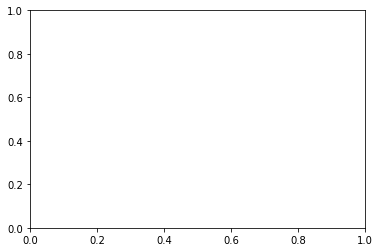

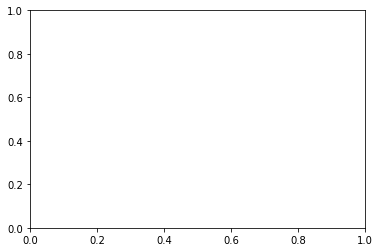

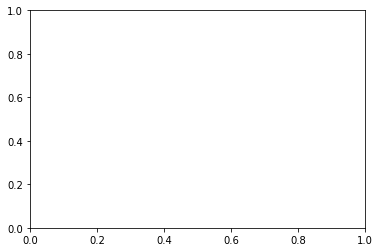

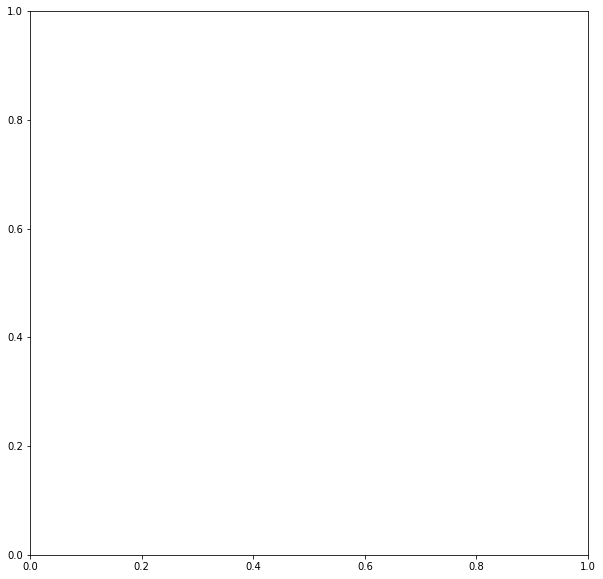

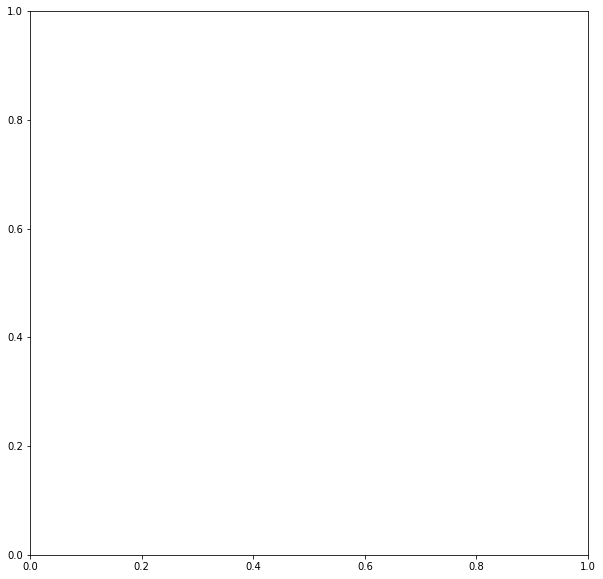

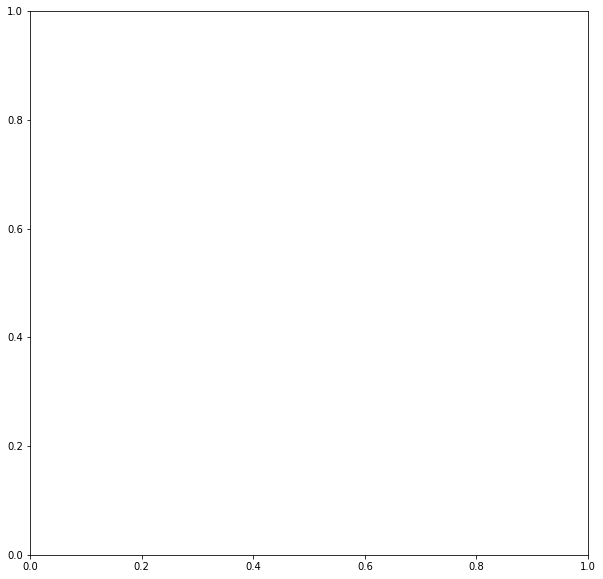

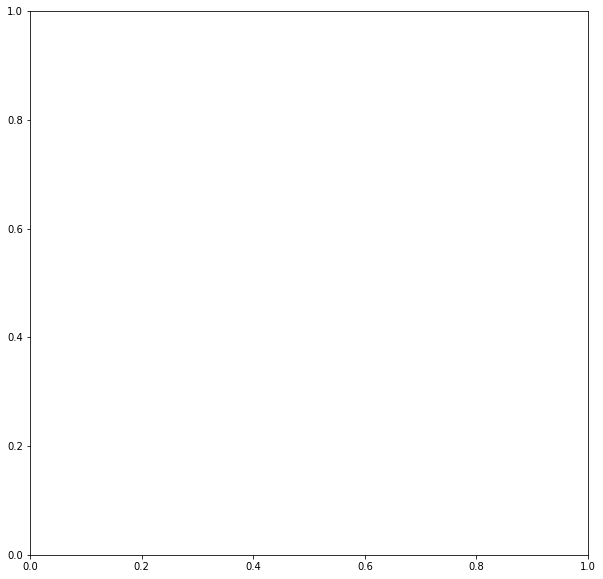

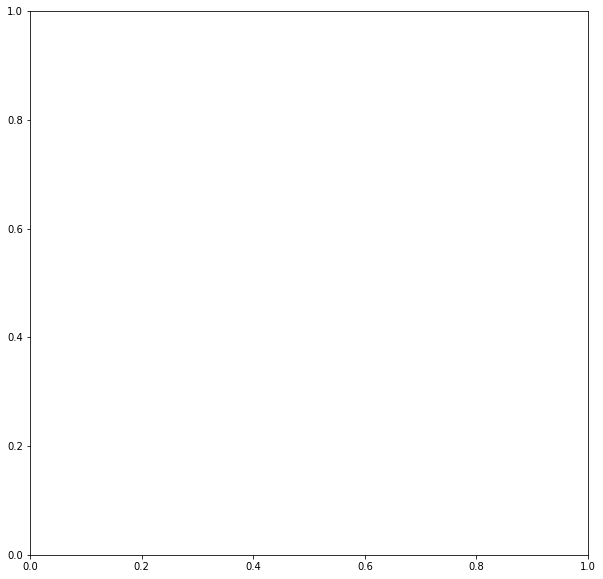

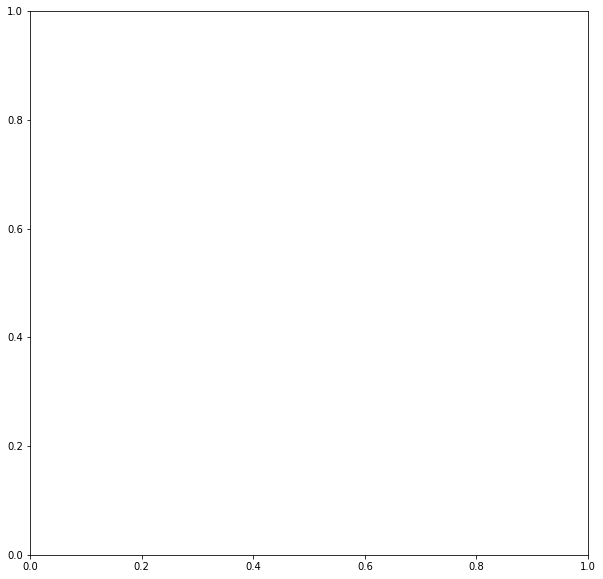

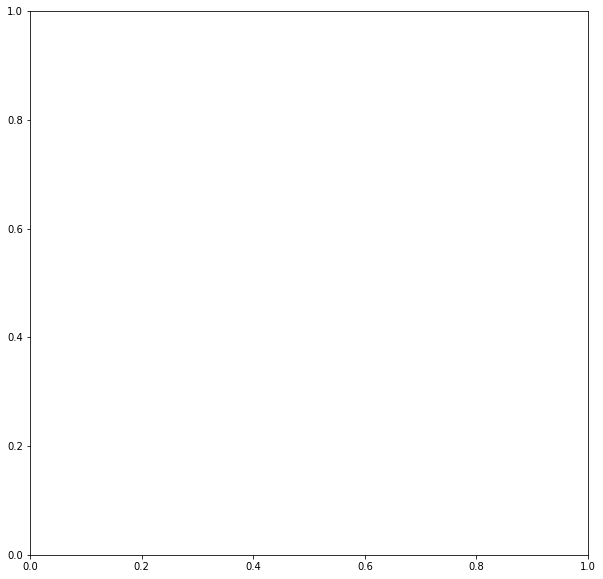

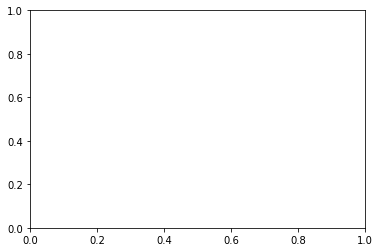

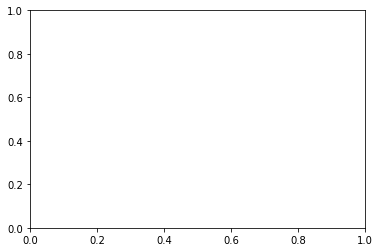

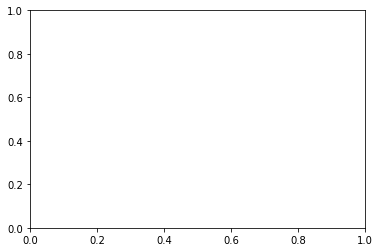

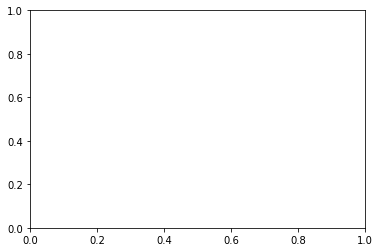

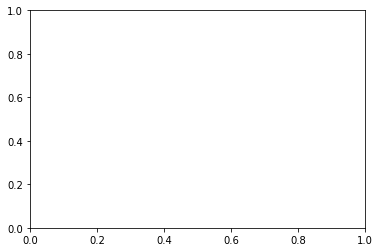

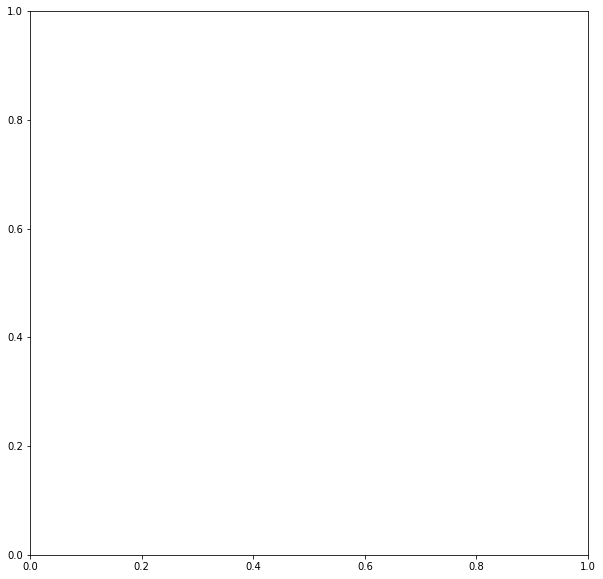

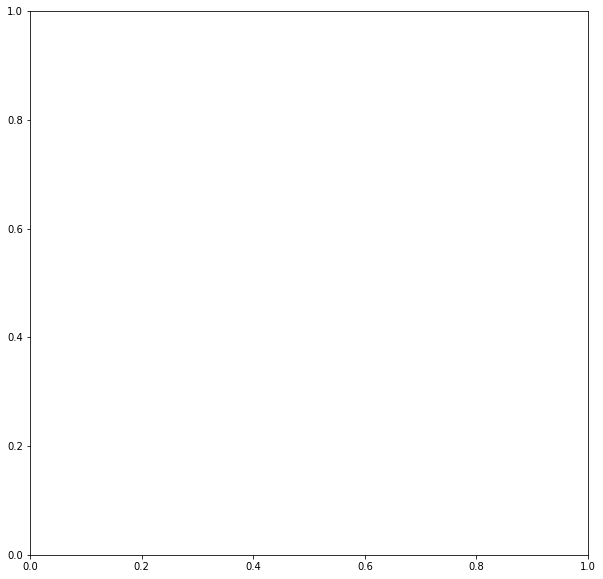

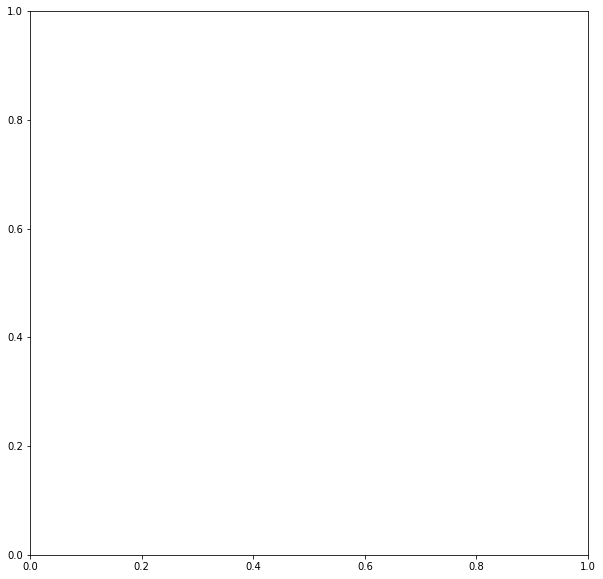

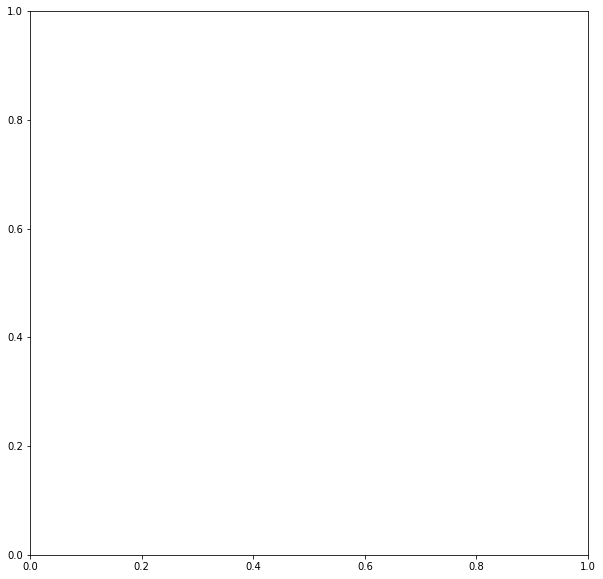

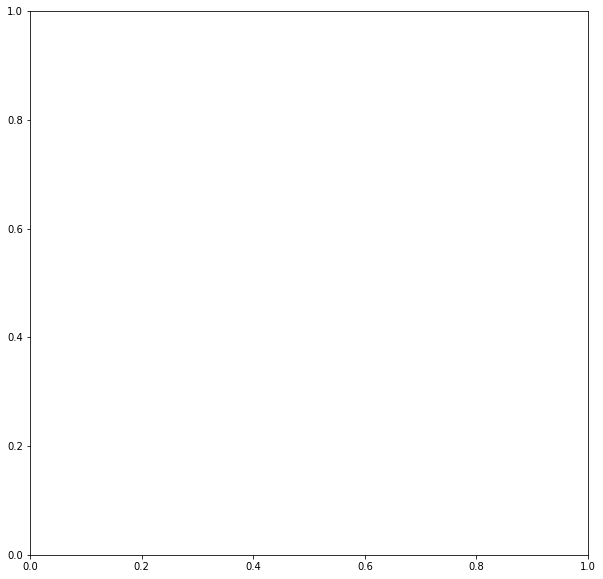

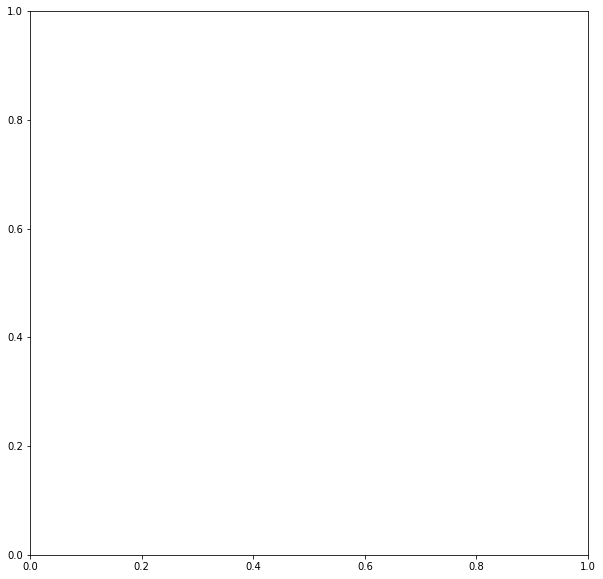

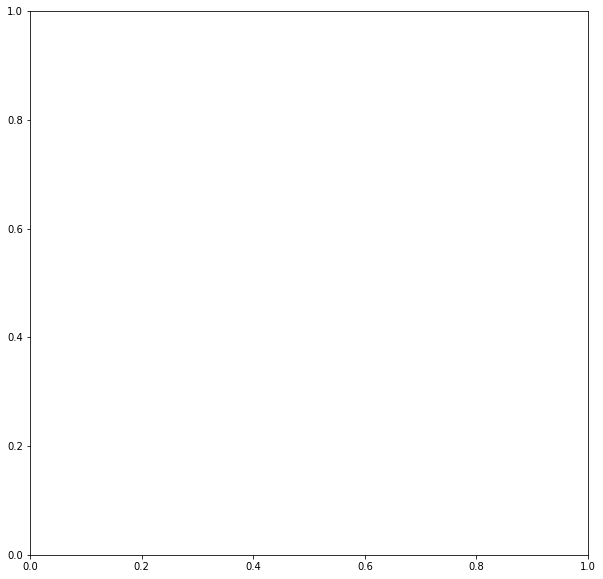

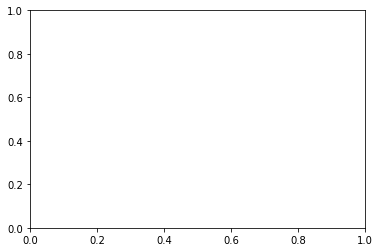

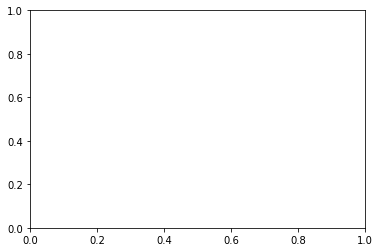

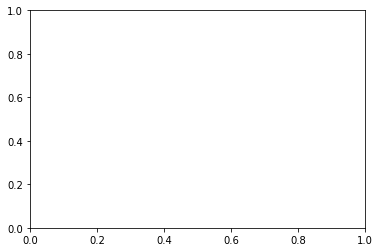

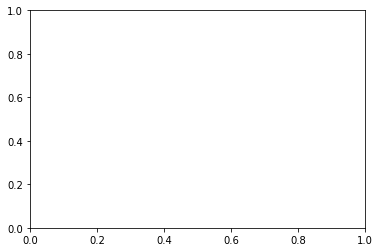

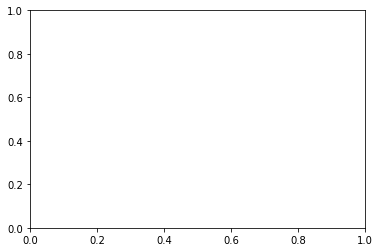

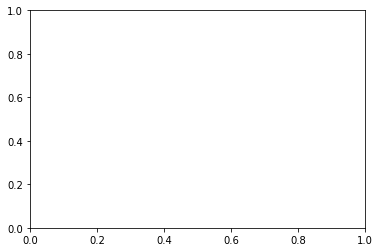

In [10]:
for dir in os.listdir(WORK_DIR):
    instance_dir = os.path.join(WORK_DIR, dir)
    print(instance_dir)
    make_plots(instance_dir)

In [11]:
df = join_df('result\\bur26b', sample_size = 500)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
df['quality'] = df['cost'] - df['optimalSolutionCost']
print(len(df))
for alg, alg_df in df.groupby(by = ['algorithm']):
    min_r = []
    mean_r = []
    for i in range(0, len(alg_df)):
        min_r.append(alg_df['quality'][0:i+1].min())
        mean_r.append(alg_df['quality'][0:i+1].mean())
    d = {'min': pd.Series(min_r), 'mean' : pd.Series(mean_r)}
    d = pd.DataFrame(d)
    print( d[['min', 'mean']])
    break